In [4]:
#install.packages("devtools")
#devtools::install_bitbucket("Grantlab/bio3d/bio3d-core", ref="core")
#devtools::install_bitbucket("Grantlab/bio3d-nma")
#devtools::install_bitbucket("Grantlab/bio3d-cna")
#install.packages('igraph')

In [5]:
library(bio3d)
#library(bio3d.cna)
#library(bio3d.nma)
library(igraph)

ERROR: Error in library(igraph): there is no package called ‘igraph’


In [10]:
pdbs.table <- read.table('pdbids.txt',header=FALSE,sep='\n', stringsAsFactors = FALSE)
data.total <- read.table('df_total.csv',header = TRUE, sep = ',',stringsAsFactors = FALSE)
rownames(data.total) <- pdbs.table$V1

ids <- as.character(pdbs.table$V1)

files <- paste0('./structures/pdbs_r/',ids, '.pdb')

In [12]:
pdbs.all <- pdbaln(files, fit=TRUE)

Reading PDB files:
./structures/pdbs_r/6vxx_A.pdb
./structures/pdbs_r/9crc_A.pdb
./structures/pdbs_r/7whb_A.pdb
./structures/pdbs_r/7sxu_A.pdb
./structures/pdbs_r/7swx_A.pdb
./structures/pdbs_r/7tf2_A.pdb
./structures/pdbs_r/7kqe_A.pdb
./structures/pdbs_r/8v0r_A.pdb
./structures/pdbs_r/7yc5_A.pdb
./structures/pdbs_r/7kea_A.pdb
./structures/pdbs_r/7l2f_A.pdb
./structures/pdbs_r/6vyb_A.pdb
./structures/pdbs_r/8cy9_A.pdb
./structures/pdbs_r/7u0p_A.pdb
./structures/pdbs_r/8hri_A.pdb
./structures/pdbs_r/8zc2_A.pdb
./structures/pdbs_r/8i9d_A.pdb
./structures/pdbs_r/7dk6_A.pdb
./structures/pdbs_r/8h01_A.pdb
./structures/pdbs_r/7v7j_A.pdb
./structures/pdbs_r/7yeg_A.pdb
./structures/pdbs_r/6vxx_B.pdb
./structures/pdbs_r/9crc_B.pdb
./structures/pdbs_r/7whb_B.pdb
./structures/pdbs_r/7sxu_B.pdb
./structures/pdbs_r/7swx_B.pdb
./structures/pdbs_r/7tf2_B.pdb
./structures/pdbs_r/7kqe_B.pdb
./structures/pdbs_r/8v0r_B.pdb
./structures/pdbs_r/7yc5_B.pdb
./structures/pdbs_r/7kea_B.pdb
./structures/pdbs_r/

In [13]:
#modes
modes <- nma(pdbs.all, subspace =20)

Warning message in nma.pdbs(pdbs.all, subspace = 20):
“6vxx_A.pdb, 9crc_A.pdb, 7whb_A.pdb, 7sxu_A.pdb, 7swx_A.pdb, 7tf2_A.pdb, 7kqe_A.pdb, 8v0r_A.pdb, 7yc5_A.pdb, 7kea_A.pdb, 7l2f_A.pdb, 6vyb_A.pdb, 8cy9_A.pdb, 7u0p_A.pdb, 8hri_A.pdb, 8zc2_A.pdb, 8i9d_A.pdb, 7dk6_A.pdb, 8h01_A.pdb, 7v7j_A.pdb, 7yeg_A.pdb, 6vxx_B.pdb, 9crc_B.pdb, 7whb_B.pdb, 7sxu_B.pdb, 7swx_B.pdb, 7tf2_B.pdb, 7kqe_B.pdb, 8v0r_B.pdb, 7yc5_B.pdb, 7kea_B.pdb, 7l2f_B.pdb, 6vyb_B.pdb, 8cy9_B.pdb, 7u0p_B.pdb, 8hri_B.pdb, 8zc2_B.pdb, 8i9d_B.pdb, 7dk6_B.pdb, 8h01_B.pdb, 7v7j_B.pdb, 7yeg_B.pdb, 6vxx_C.pdb, 9crc_C.pdb, 7whb_C.pdb, 7sxu_C.pdb, 7swx_C.pdb, 7tf2_C.pdb, 7kqe_C.pdb, 8v0r_C.pdb, 7yc5_C.pdb, 7kea_C.pdb, 7l2f_C.pdb, 6vyb_C.pdb, 8cy9_C.pdb, 7u0p_C.pdb, 8hri_C.pdb, 8zc2_C.pdb, 8i9d_C.pdb, 7dk6_C.pdb, 8h01_C.pdb, 7v7j_C.pdb, 7yeg_C.pdb, 7tf2_D.pdb, 8zc2_D.pdb, 7v7j_D.pdb, 7tf2_E.pdb, 8zc2_E.pdb, 7v7j_E.pdb, 7tf2_F.pdb, 8zc2_F.pdb, 7v7j_F.pdb might have missing residue(s) in structure:
   Fluctuations at neighboring positio


Details of Scheduled Calculation:
  ... 72 input structures 
  ... storing 20 eigenvectors for each structure 
  ... dimension of x$U.subspace: ( 2916x20x72 )
  ... coordinate superposition prior to NM calculation 
  ... aligned eigenvectors (gap containing positions removed)  
  ... estimated memory usage of final 'eNMA' object: 32.6 Mb 

  |======================================================================| 100%


In [14]:
cijs <- dccm(modes)

Warning message in dccm.enma(modes):
“20 modes used in the calculation of the DCCMs”


In [15]:
pca_dccm_ens <- pca.array(cijs$all.dccm)

In [19]:
data.total$colorconf <- with(data.total, ifelse(conformation == 'closed', 'green', 'red'))

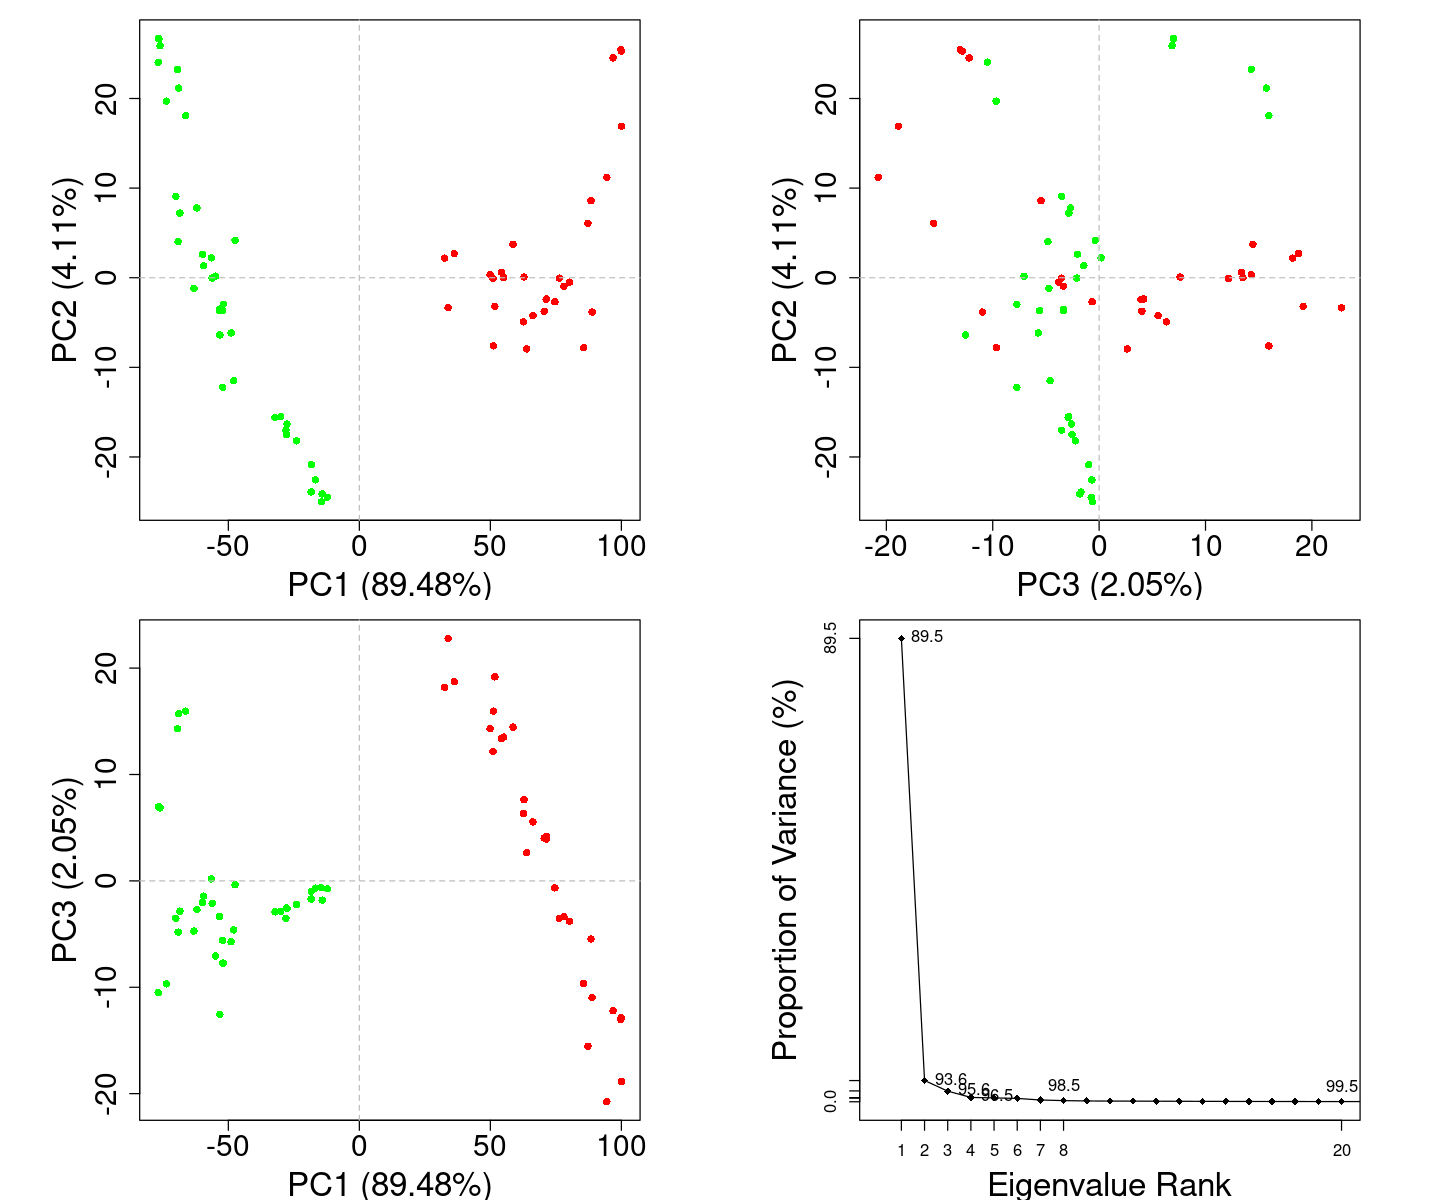

In [21]:
options(repr.plot.width=12, repr.plot.height=10)
plot.pca(pca_dccm_ens, col=data.total$colorconf, cex.lab=2, cex.axis=1.8, pch=16)

In [22]:
cij.close_open <- filter.dccm(cijs, cutoff.cij=0.3, xyz=pdbs.all, fac=data.total$conformation,
                              scut=0, ncore=1) 

  |======================================================================| 100%
  |======================================================================| 100%


In [23]:
nets.close_open <- cna(cij.close_open, cluster.method = 'walk')

In [24]:
source("./scripts/domains_new.R")
source("./scripts/remodel.cna_igraph2.0.3.R")

In [25]:
nnet.feature.close_open <- remodel.cna(nets.close_open, member = membership,col = c("#FF0000", "#bf819e", "#4169e1", "#EFBF04", "#ff8c00", "#985c41", "#706e0c", "#b47804", "#8a2be2","#ffffff","#9acd32","#a52a2a","#008100"),
                                       method="sum", scut=4, normalize=FALSE, col.edge='feature', coledge.cutoff = 0.25)

Loading required package: parallel

Loading required package: classInt



In [26]:
# Rotated pdb for better view of the networks
pdb.rot <- read.pdb('./files/6vxx_A_rotated_2.pdb') 

In [27]:
cent.close <- layout.cna(nnet.feature.close_open$close, pdb=pdb.rot, k=3)[,1:2]
cent.closefull <- layout.cna(nnet.feature.close_open$close, pdb=pdb.rot, k=3,full = TRUE)[,1:2]
cent.open <- layout.cna(nnet.feature.close_open$open, pdb=pdb.rot, k=3)[,1:2]
cent.openfull <- layout.cna(nnet.feature.close_open$open, pdb=pdb.rot, k=3,full = TRUE)[,1:2]

w_scale <- 0.003
w_close = (E(nnet.feature.close_open$close$community.network)$weight)*w_scale
w_open = (E(nnet.feature.close_open$open$community.network)$weight)*w_scale

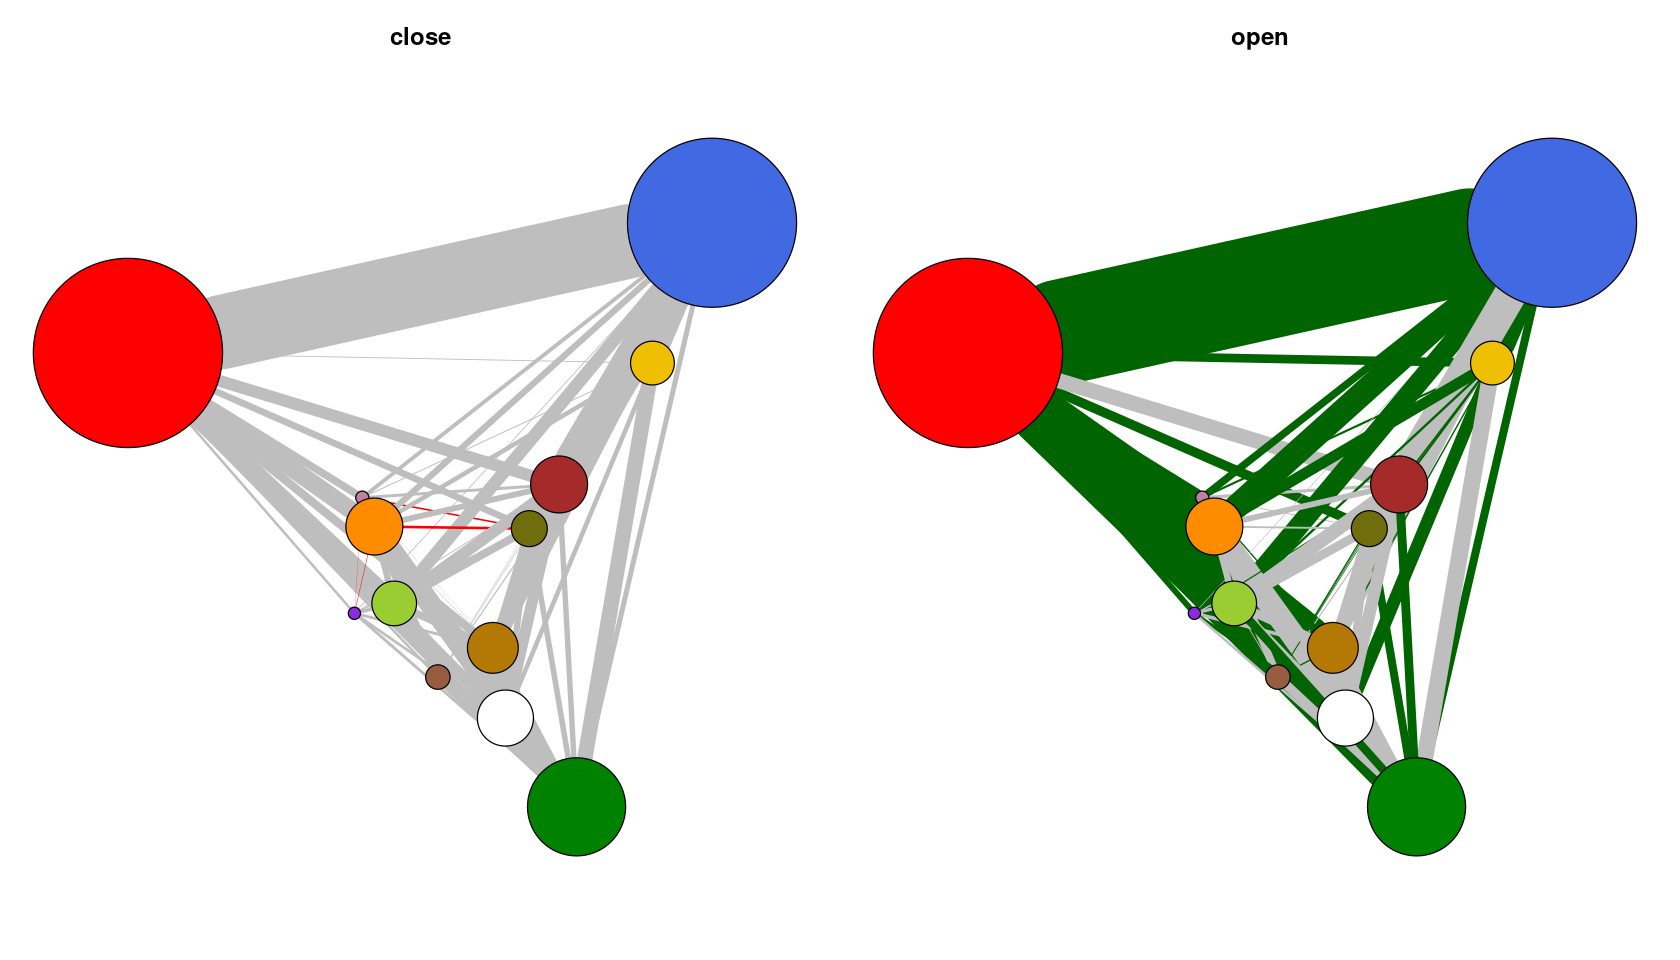

In [28]:
options(repr.plot.width=14, repr.plot.height=8)
layout(matrix(c(1:2), 1, 2))
par(mar=c(0.1, 0.1, 3, 0.1))

plot.cna(nnet.feature.close_open$close, layout = cent.close, vertex.label=NA, main="close", vertex.size = V(nnet.feature.close_open$close$community.network)$size*0.3,weights = w_close)
plot(nnet.feature.close_open$open, layout=cent.open, vertex.label=NA,main="open", vertex.size = V(nnet.feature.close_open$open$community.network)$size*0.3, weights = w_open)
